### create su data from matlab

In [15]:

import sys 
import obspy
import numpy as np
from seisflows.plugins import adjoint, misfit, readers, writers
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt 
from obspy.core import Stream, Trace

from scipy.io import loadmat

# define seismic data reader and writer
reader = getattr(readers,'su')
writer = getattr(writers, 'su')


data1 = reader('obf/input/','Up_sp_mid_20181203_istf_1src_60rec_350k_650k_f0500000_DT4d_8.su')
#data1[0].stats.sampling_rate = 1/4e-8
data2 = data1.copy()

# data_mat_filename = 'Fan07_SRC08_ts2500_mat'
# data_mat_path ='obf/input/' + data_mat_filename + '.mat'

# from scipy.io import loadmat
# matfile2=loadmat(data_mat_path)
# data_mat_numpy = matfile2['fan_beam_scan_full']


UpSampleFactor : 0.0800000000000000017 
sampling rate fsNewsyncomp after resampling : 25000000.000000 Hz
2
189
('freq_step_starNewobs', 26)
('freq_step_endNewobs', 2359)
('freq_step_starNewsyn', 26)
('freq_step_endNewsyn', 2359)
textplot- run


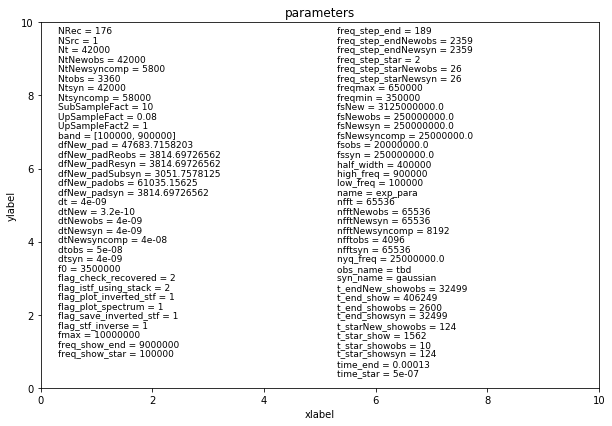

In [2]:
#a default value
save_exp_para_pickledump_fn='0'
execfile('plib_load.py')
execfile('pconstant_setup.py')

In [27]:
for i in range(1,21):
    # convert mat to numpy from
    data_obs_filename = 'Fan%02d_SRC08_ts2500_mat' % i
    data_obs_path ='obf/input/' + data_obs_filename + '.mat'
    matfile2=loadmat(data_obs_path)
    data_obs = matfile2['fan_beam_scan_full']
    
    i2= (i-1) 
    os.makedirs('obf/output/%06d' % i2)     
    save_su_fn = '%06d/Up_file_single' % i2 
    data_su_path='obf/output/' + save_su_fn + '.su'
    print('data_su_path:',data_su_path)
    ##### run once would be enough
    ##data_Re_obs=np.zeros((Ntsyncomp,176))
    for trace_num in range(58,119,1):
#         print('trace_num is',trace_num)
        trace_obs = data_obs[:,trace_num]
        tck = interpolate.splrep(t_total_obs, trace_obs, s=0)
        traceNew_obs = interpolate.splev(t_totalNew_obs, tck, der=0)
        #data_Re_obs[:,trace_num] = traceNew_obs[0:]
        Ntcomp = NtNewsyncomp
        time_delay=621
        a = np.zeros(np.abs(time_delay))
        traceNew_obs_dj = np.append(a,traceNew_obs[0:Ntsyn-time_delay], axis=0)
        a = np.zeros(np.abs(Ntsyncomp - Ntsyn))
        traceNew_obs_dj_full = np.append(traceNew_obs_dj,a, axis=0)
        traceNew_obs_dj_subsample = traceNew_obs_dj_full[0:Ntsyncomp:SubSampleFact]
        new_trace_number = trace_num-58  
        print('trace_num is',new_trace_number)
        data2[new_trace_number].data[:] = traceNew_obs_dj_subsample
        data2[new_trace_number].stats.sampling_rate = 1/4e-8
    #pickle.dump(data_Re_obs,open(save_Re_obs_pickledump_fn,'wb'))
    
    data2.write(data_su_path,format='SU')

('data_su_path:', 'obf/output/000000/Up_file_single.su')
('trace_num is', 0)
('trace_num is', 1)
('trace_num is', 2)
('trace_num is', 3)
('trace_num is', 4)
('trace_num is', 5)
('trace_num is', 6)
('trace_num is', 7)
('trace_num is', 8)
('trace_num is', 9)
('trace_num is', 10)
('trace_num is', 11)
('trace_num is', 12)
('trace_num is', 13)
('trace_num is', 14)
('trace_num is', 15)
('trace_num is', 16)
('trace_num is', 17)
('trace_num is', 18)
('trace_num is', 19)
('trace_num is', 20)
('trace_num is', 21)
('trace_num is', 22)
('trace_num is', 23)
('trace_num is', 24)
('trace_num is', 25)
('trace_num is', 26)
('trace_num is', 27)
('trace_num is', 28)
('trace_num is', 29)
('trace_num is', 30)
('trace_num is', 31)
('trace_num is', 32)
('trace_num is', 33)
('trace_num is', 34)
('trace_num is', 35)
('trace_num is', 36)
('trace_num is', 37)
('trace_num is', 38)
('trace_num is', 39)
('trace_num is', 40)
('trace_num is', 41)
('trace_num is', 42)
('trace_num is', 43)
('trace_num is', 44)
('trace_

('trace_num is', 35)
('trace_num is', 36)
('trace_num is', 37)
('trace_num is', 38)
('trace_num is', 39)
('trace_num is', 40)
('trace_num is', 41)
('trace_num is', 42)
('trace_num is', 43)
('trace_num is', 44)
('trace_num is', 45)
('trace_num is', 46)
('trace_num is', 47)
('trace_num is', 48)
('trace_num is', 49)
('trace_num is', 50)
('trace_num is', 51)
('trace_num is', 52)
('trace_num is', 53)
('trace_num is', 54)
('trace_num is', 55)
('trace_num is', 56)
('trace_num is', 57)
('trace_num is', 58)
('trace_num is', 59)
('trace_num is', 60)
('data_su_path:', 'obf/output/000007/Up_file_single.su')
('trace_num is', 0)
('trace_num is', 1)
('trace_num is', 2)
('trace_num is', 3)
('trace_num is', 4)
('trace_num is', 5)
('trace_num is', 6)
('trace_num is', 7)
('trace_num is', 8)
('trace_num is', 9)
('trace_num is', 10)
('trace_num is', 11)
('trace_num is', 12)
('trace_num is', 13)
('trace_num is', 14)
('trace_num is', 15)
('trace_num is', 16)
('trace_num is', 17)
('trace_num is', 18)
('trace_

('trace_num is', 1)
('trace_num is', 2)
('trace_num is', 3)
('trace_num is', 4)
('trace_num is', 5)
('trace_num is', 6)
('trace_num is', 7)
('trace_num is', 8)
('trace_num is', 9)
('trace_num is', 10)
('trace_num is', 11)
('trace_num is', 12)
('trace_num is', 13)
('trace_num is', 14)
('trace_num is', 15)
('trace_num is', 16)
('trace_num is', 17)
('trace_num is', 18)
('trace_num is', 19)
('trace_num is', 20)
('trace_num is', 21)
('trace_num is', 22)
('trace_num is', 23)
('trace_num is', 24)
('trace_num is', 25)
('trace_num is', 26)
('trace_num is', 27)
('trace_num is', 28)
('trace_num is', 29)
('trace_num is', 30)
('trace_num is', 31)
('trace_num is', 32)
('trace_num is', 33)
('trace_num is', 34)
('trace_num is', 35)
('trace_num is', 36)
('trace_num is', 37)
('trace_num is', 38)
('trace_num is', 39)
('trace_num is', 40)
('trace_num is', 41)
('trace_num is', 42)
('trace_num is', 43)
('trace_num is', 44)
('trace_num is', 45)
('trace_num is', 46)
('trace_num is', 47)
('trace_num is', 48)
(

('trace_num is', 37)
('trace_num is', 38)
('trace_num is', 39)
('trace_num is', 40)
('trace_num is', 41)
('trace_num is', 42)
('trace_num is', 43)
('trace_num is', 44)
('trace_num is', 45)
('trace_num is', 46)
('trace_num is', 47)
('trace_num is', 48)
('trace_num is', 49)
('trace_num is', 50)
('trace_num is', 51)
('trace_num is', 52)
('trace_num is', 53)
('trace_num is', 54)
('trace_num is', 55)
('trace_num is', 56)
('trace_num is', 57)
('trace_num is', 58)
('trace_num is', 59)
('trace_num is', 60)


In [25]:
i-1

0

In [ ]:
Ntcomp = NtNewsyncomp
time_delay=621
a = np.zeros(np.abs(time_delay))
traceNew_obs_dj = np.append(a,traceNew_obs[0:Ntsyn-time_delay], axis=0)
a = np.zeros(np.abs(Ntsyncomp - Ntsyn))
traceNew_obs_dj_full = np.append(traceNew_obs_dj,a, axis=0)
traceNew_obs_dj_subsample = traceNew_obs_dj_full[0:Ntsyncomp:SubSampleFact]


In [ ]:
data2 = reader('obf/input/','Up_sp_mid_20181130_istf_fan7_350k_650k_f0500000_DT4d_8.su')

In [ ]:
data2[0].data

In [ ]:
data2[60].data